# Neural Network classification with Pytorch

Classification is a problem of predicting whether something is on one thing or another (there can be multiple things such as dogs/ cats, pizza/steak etc.)

# 1. Make classification data and get it ready

In [1]:
import sklearn
from sklearn.datasets import make_circles

# make 1000 sampls

n_samples=1000

#create circles

X,y= make_circles(n_samples,
                 noise=0.03,
                 random_state=42)

print(len(X),len(y))

1000 1000


In [2]:
print(f'First five samples of X: {X[:5]}\n and first five samples of y:{y[:5]}')

First five samples of X: [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
 and first five samples of y:[1 1 1 1 0]


In [3]:
## Make dataframe of circle data

import pandas as pd

circles=pd.DataFrame({'X1': X[:,0], 
                      'X2': X[:,1],
                       'label':y})

circles.head()

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


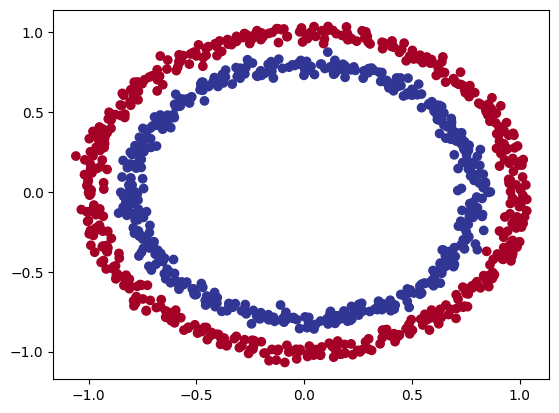

In [4]:
## visualize the data

import matplotlib.pyplot as plt

plt.scatter(x=X[:,0],
            y=X[:,1],
            c=y,
            cmap=plt.cm.RdYlBu);

In [5]:
# Check different labels
circles.label.value_counts()

label
1    500
0    500
Name: count, dtype: int64

# Note: The data we are working with toy data set, data is small enough to experiment on but sizeable to work on fundamental of neural classifictaion

# 1.1 Check input and output shapes

In [6]:
X.shape,y.shape

((1000, 2), (1000,))

In [7]:
## view first example of features and labels

X_sample = X[0]
y_sample =y[0]

print(f'Values for one sample of X: {X_sample} and the same for y: {y_sample}')
print(f'Values for one sample of X: {X_sample.shape} and the same for y: {y_sample.shape}')



Values for one sample of X: [0.75424625 0.23148074] and the same for y: 1
Values for one sample of X: (2,) and the same for y: ()


In [8]:
type(X), X.dtype

(numpy.ndarray, dtype('float64'))

# Turn th data now into tensors and create train test split

In [9]:
import torch
from IPython.display import display

X=torch.from_numpy(X).type(torch.float)
y=torch.from_numpy(y).type(torch.float)

display(X[:5], y[:5])

tensor([[ 0.7542,  0.2315],
        [-0.7562,  0.1533],
        [-0.8154,  0.1733],
        [-0.3937,  0.6929],
        [ 0.4422, -0.8967]])

tensor([1., 1., 1., 1., 0.])

In [10]:
type(X), X.dtype, y.dtype

(torch.Tensor, torch.float32, torch.float32)

In [11]:
#torch.manual_seed(42)

# spit the data fro train and test

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,
                                              y,
                                              test_size=0.2,   ### 30% of data be test and 80% be for train
                                              random_state=42)
len(X_train), len(X_test), len(y_train), len(y_test), n_samples

(800, 200, 800, 200, 1000)

# building a model to classify our blue and red rots

to do so we want to:

1. Setup device agnostic code, so our device runs on GPU if there is one
2. constrauct a model (by subclassing 'nn.module')
3. Define a loss function and optimizer
4. create a training and test loop

In [12]:
import torch
from torch import nn

device= 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

# Now we have setup device agnostic code, lets create a model that:
 1. Subclass nn.Module(almost all models in Pytorch subclass nn.Module)
 2. Defines a forward() method that outlines the forward pass (or forward computation) of the model
 3. Defines a forward() method that outlines the forward pass (or forward computation) of the model
 4. Instatntiate an instance of our model class and send it to the target device
 
 # Also have a look in this website for more GUI experience: 
 #  https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.36951&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false
 
 # also to draw good diagrams, use figma
 
 # https://www.figma.com/

In [13]:
# 1. Construct a model class that subclasses nn.Module
class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        # 2. Create 2 nn.Linear layers capable of handling X and y input and output shapes
        self.layer_1 = nn.Linear(in_features=2, out_features=5) # takes in 2 features (X), produces 5 features
        self.layer_2 = nn.Linear(in_features=5, out_features=1) # takes in 5 features, produces 1 feature (y)
    
    # 3. Define a forward method containing the forward pass computation
    def forward(self, x):
        # Return the output of layer_2, a single feature, the same shape as y
        return self.layer_2(self.layer_1(x)) # computation goes through layer_1 first then the output of layer_1 goes through layer_2

# 4. Create an instance of the model and send it to target device
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [14]:
next(model_0.parameters()).device

device(type='cpu')

In [15]:
## Let's replicate the model above using nn.Sequential()

model_0=nn.Sequential(
        nn.Linear(in_features=2,out_features=5),
         nn.Linear(in_features=5,out_features=1)
        ).to(device)
model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [16]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.1575,  0.4849],
                      [ 0.5829,  0.1231],
                      [-0.4552,  0.7035],
                      [-0.1995, -0.6705],
                      [-0.4134, -0.0388]])),
             ('0.bias', tensor([ 0.3997, -0.4459, -0.4228,  0.2571,  0.4818])),
             ('1.weight',
              tensor([[-0.3299, -0.3163,  0.1089, -0.1597, -0.2619]])),
             ('1.bias', tensor([0.1012]))])

In [17]:
# Make predictions with the model
untrained_preds = model_0(X_test.to(device))
print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(y_test)}, Shape: {y_test.shape}")
print(f"\nFirst 10 predictions:\n{untrained_preds[:10]}")
print(f"\nFirst 10 test labels:\n{y_test[:10]}")

Length of predictions: 200, Shape: torch.Size([200, 1])
Length of test samples: 200, Shape: torch.Size([200])

First 10 predictions:
tensor([[-0.0517],
        [-0.1100],
        [ 0.0011],
        [-0.0662],
        [-0.1579],
        [-0.1922],
        [-0.2305],
        [-0.2501],
        [ 0.0077],
        [-0.1157]], grad_fn=<SliceBackward0>)

First 10 test labels:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [18]:
X_test[:10], y_test[:10]

(tensor([[-0.3752,  0.6827],
         [ 0.0154,  0.9600],
         [-0.7028, -0.3147],
         [-0.2853,  0.9664],
         [ 0.4024, -0.7438],
         [ 0.6323, -0.5711],
         [ 0.8561,  0.5499],
         [ 1.0034,  0.1903],
         [-0.7489, -0.2951],
         [ 0.0538,  0.9739]]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

## 2.1 Setup loss funtion and optimizer

which loss function or optimizer we should use?

again....problem specific

for example for regression we might want MAE (mean absolute error) or MSE(Mean square error).

for classification we might want want binary cross entropy or categrorical cross entropy (cross entropy)

# As a remider, loss function measures how wrong is our model predictons are!!!

and for optimizers, two of most common and useful are SGD and ADAM, however pytorch has many built in options.

* for the loss functions we are going to use torch.nn.BECWithLogitLoss(), for more or what binary cross entropy is


In [19]:
#setup loss function

# loss_fn = nn.BCELoss()  ##BCELoss requires inputs to have gone through the sigmoid activation function prior to input to BCE loss

loss_fn = nn.BCEWithLogitsLoss()  ###BCEWithLogitsLoss uses sigmoid activation functions built in
# also BCEWithLogitsLoBCELoss

optimizer=torch.optim.SGD(params=model_0.parameters(),
                         lr=0.1)

In [20]:
#calculate accuracy-out of 100 example , what percentage does our model get right?

def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc=(correct/len(y_pred))*100
    return acc




# Train model

To train the model, we are going to build our trin loop:

1) forward pass
2) calculate the loss
3) optimizer zero grad
4) loss backward (backpropagation)
5) optimizer setup (gradient descent)

## 3.1 Goin from raw logits -> prediction probabilities-> prediction labels

our model outputs are going to be raw **logits**

we can convert these **logits** into **prediction probabilities** by passing them through
some kind of activation function (e.g. sigmoid for binary classification and softmax for multiclass classification)

Then we can convert our models prediction probabilities to **Prediction labels** by either rounding them or taking the **argmax(x)**


In [21]:
## view the first 5 outputs of the forward pass on test data
model_0.eval()
with torch.inference_mode():
    y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[-0.0517],
        [-0.1100],
        [ 0.0011],
        [-0.0662],
        [-0.1579]])

In [22]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [23]:
## use sigmoid  activation function on our model to turn them into probability

y_pred_probs=torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.4871],
        [0.4725],
        [0.5003],
        [0.4835],
        [0.4606]])

for our prediction probabilty values, we need to perform a range style rounding on them:

* 'y_pred_probs' >=0.5, 'y=1 (class1)
* 'y_pred_probs'< 0.5, 'y=1 (class1)

In [24]:
##find the predicted labels

y_preds=torch.round(y_pred_probs)

#in full (logits -> pred probs -> pred labels)

y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

# check for quality

print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

# get rid of extra dimension

y_preds.squeeze()



tensor([True, True, True, True, True])


tensor([0., 0., 1., 0., 0.])

In [25]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

## Building a training and testing loop

In [26]:

torch.manual_seed(42)

#set the number of epochs

epochs =100

#put data to target device

X_train,y_train=X_train.to(device), y_train.to(device)
X_test, y_test =X_test.to(device), y_test.to(device)

## build our training andd evaluation loop

for epoch in range(epochs):
    ##Training
    model_0.train()
    
    # 1. Forward pass
    
    y_logits = model_0(X_train).squeeze()    ## we are using squeeze to remove extrain dimension
    y_pred = torch.round(torch.sigmoid(y_logits)) ## turn logits -> pred probs -> pred labels
    
    ## calculate loss/accuracy
    
    #loss = lossfn(torch.sigmoid(y_logits), ## nn.BCELoss expects prediction probabilities as input
     #                            y_train)
    
    loss=loss_fn(y_logits,  ## nn.BCEWithLogitsLoss expects raw logits as input
                 y_train)
    
    acc = accuracy_fn(y_true=y_train,
                       y_pred =y_pred)
    
    # optimiter zero grad
    
    optimizer.zero_grad()
    
    ##loss backward (backpropagation)
    
    loss.backward
    
    ## optimizer step (gradient descent)
    
    optimizer.step()
    
    ##testing
    
    model_0.eval()
    
    with torch.inference_mode():
        #forward pass
        test_logits = model_0(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        
        ##calculate test loss/acc
        
        test_loss = loss_fn(test_logits,
                               y_test)
        test_acc = accuracy_fn(y_true = y_test,
                            y_pred =test_pred)
        
        ## Print out whats happening
        if epoch % 10 ==0:
            print(f'Epoch:{epoch} | Loss : {loss:.5f}) | Acc: {acc: .2f}% | Test Loss: {test_loss: .5f}| test acc: {test_acc: .2f}%')
                                                                      

Epoch:0 | Loss : 0.69591) | Acc:  45.12% | Test Loss:  0.69393| test acc:  46.50%
Epoch:10 | Loss : 0.69591) | Acc:  45.12% | Test Loss:  0.69393| test acc:  46.50%
Epoch:20 | Loss : 0.69591) | Acc:  45.12% | Test Loss:  0.69393| test acc:  46.50%
Epoch:30 | Loss : 0.69591) | Acc:  45.12% | Test Loss:  0.69393| test acc:  46.50%
Epoch:40 | Loss : 0.69591) | Acc:  45.12% | Test Loss:  0.69393| test acc:  46.50%
Epoch:50 | Loss : 0.69591) | Acc:  45.12% | Test Loss:  0.69393| test acc:  46.50%
Epoch:60 | Loss : 0.69591) | Acc:  45.12% | Test Loss:  0.69393| test acc:  46.50%
Epoch:70 | Loss : 0.69591) | Acc:  45.12% | Test Loss:  0.69393| test acc:  46.50%
Epoch:80 | Loss : 0.69591) | Acc:  45.12% | Test Loss:  0.69393| test acc:  46.50%
Epoch:90 | Loss : 0.69591) | Acc:  45.12% | Test Loss:  0.69393| test acc:  46.50%


## 4. Make predictions and evaluate the model

From the metrics, it loos like our model is not learning anything...

so to inspect it, lets make some predictions and make them visualize

to do so we are going to import a function called "plot_descision_boundary()"


In [27]:
def plot_decision_boundary(model: torch.nn.Module, X: torch.Tensor, y: torch.Tensor):
    """Plots decision boundaries of model predicting on X in comparison to y.

    Source - https://madewithml.com/courses/foundations/neural-networks/ (with modifications)
    """
    # Put everything to CPU (works better with NumPy + Matplotlib)
    model.to("cpu")
    X, y = X.to("cpu"), y.to("cpu")

    # Setup prediction boundaries and grid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101), np.linspace(y_min, y_max, 101))

    # Make features
    X_to_pred_on = torch.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).float()

    # Make predictions
    model.eval()
    with torch.inference_mode():
        y_logits = model(X_to_pred_on)

    # Test for multi-class or binary and adjust logits to prediction labels
    if len(torch.unique(y)) > 2:
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)  # mutli-class
    else:
        y_pred = torch.round(torch.sigmoid(y_logits))  # binary

    # Reshape preds and plot
    y_pred = y_pred.reshape(xx.shape).detach().numpy()
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

In [28]:
def plot_predictions(
    train_data, train_labels, test_data, test_labels, predictions=None
):
    """
  Plots linear training data and test data and compares predictions.
  """
    plt.figure(figsize=(10, 7))

    # Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

    # Plot test data in green
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

    if predictions is not None:
        # Plot the predictions in red (predictions were made on the test data)
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

    # Show the legend
    plt.legend(prop={"size": 14})


# Calculate accuracy (a classification metric)

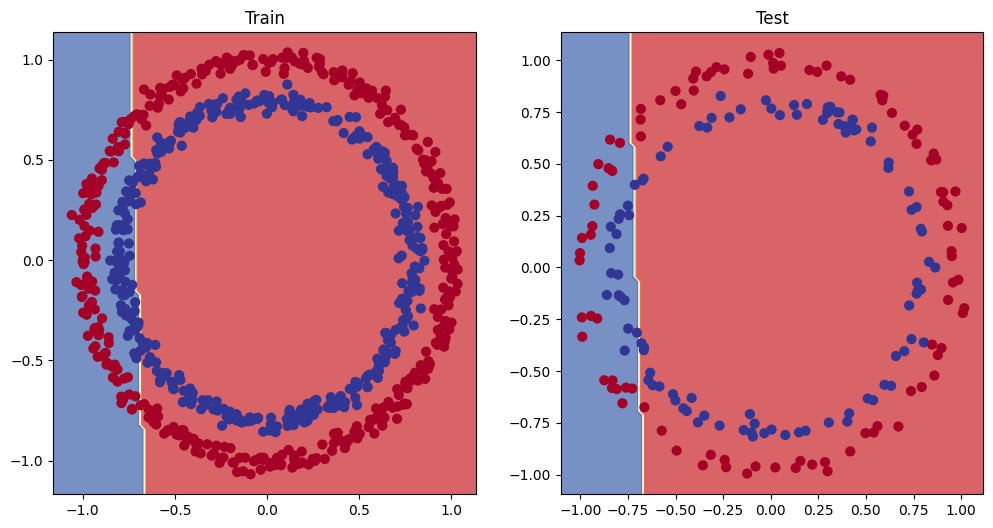

In [29]:
import numpy as np
##plot descion boundary of the model

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.title('Train')
plot_decision_boundary(model_0,X_train,y_train)

plt.subplot(1,2,2)
plt.title('Test')
plot_decision_boundary(model_0,X_test,y_test)

# Improving a model ( from a model perspective)

* Add more layers -give the model more chance to learn patterns in data
*Add more hidden units -go from 5 hidden units to 10 hidden units( out_features)
*fit for longer
*changing the activation functions
*change the learning rate
*change the loss function

These options are all from a models perspective because they deal directly with the model, rather then the data

and because these options are all vlues we can change, they are referred as hyperparameters

Lets try and improve our model by:

* Adding more hidden units: 5 ->10
* Increase the number of layers: 2 -> 3
* Increase the number of epochs: 100 -> 1000


In [30]:
class CircleModelV1(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features =2, out_features = 10)
        self.layer_2 = nn.Linear(in_features =10, out_features = 10)
        self.layer_3 = nn.Linear(in_features =10, out_features = 1)
        
    def forward(self,x):
        #z=self.layer_1(x)
        #z=self.layer_2(z)
        #z=self.layer_3(z)'
        return self.layer_3(self.layer_2(self.layer_1(x))) 
    # in above, this way of writing operations levarages speed up where possible behind the scene
    
model_1 =CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [31]:
### create a loss function

loss_fn = nn.BCEWithLogitsLoss()

## create a optimizer
optimizer=torch.optim.SGD(params=model_1.parameters(),
                             lr=0.1)


In [32]:
# write a training and evaluation loop for model_1

torch.manual_seed(42)

## train for longer

epochs = 1000

### put data in target device

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device),  y_test.to(device)

for epoch in range (epochs):
    ## training
    model_1.train()
    4#forward training
    y_logits = model_1(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) ## logits -> pred probability -> predicted labels
    
    ##calculate loss and accuracy
    
    loss = loss_fn(y_logits, y_train)
    acc=accuracy_fn(y_true=y_train,
                   y_pred = y_pred)
    
    ##optimizer zero grad
    optimizer.zero_grad()
    
    ## Loss backward (backpropagation)
    
    loss.backward()
    
    ##optimizer step
    
    optimizer.step()
    
    ##testing
    
    model_1.eval()
    
    with torch.inference_mode():
        #forwaard pass
        test_logits = model_1(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        
        ## calculate the los
        
        test_loss = loss_fn(test_logits,
                           y_test)
        
        test_acc = accuracy_fn(y_true=y_test,
                              y_pred =test_pred)
        
        
        ## printout things happeneing
        
        if epoch % 100 ==0:
            print(f'Eoch:{epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test loss: {test_loss:.5f}, Test accuracy : {test_acc:.2f}%')
    

Eoch:0 | Loss: 0.69396, Acc: 50.88% | Test loss: 0.69261, Test accuracy : 51.00%
Eoch:100 | Loss: 0.69305, Acc: 50.38% | Test loss: 0.69379, Test accuracy : 48.00%
Eoch:200 | Loss: 0.69299, Acc: 51.12% | Test loss: 0.69437, Test accuracy : 46.00%
Eoch:300 | Loss: 0.69298, Acc: 51.62% | Test loss: 0.69458, Test accuracy : 45.00%
Eoch:400 | Loss: 0.69298, Acc: 51.12% | Test loss: 0.69465, Test accuracy : 46.00%
Eoch:500 | Loss: 0.69298, Acc: 51.00% | Test loss: 0.69467, Test accuracy : 46.00%
Eoch:600 | Loss: 0.69298, Acc: 51.00% | Test loss: 0.69468, Test accuracy : 46.00%
Eoch:700 | Loss: 0.69298, Acc: 51.00% | Test loss: 0.69468, Test accuracy : 46.00%
Eoch:800 | Loss: 0.69298, Acc: 51.00% | Test loss: 0.69468, Test accuracy : 46.00%
Eoch:900 | Loss: 0.69298, Acc: 51.00% | Test loss: 0.69468, Test accuracy : 46.00%


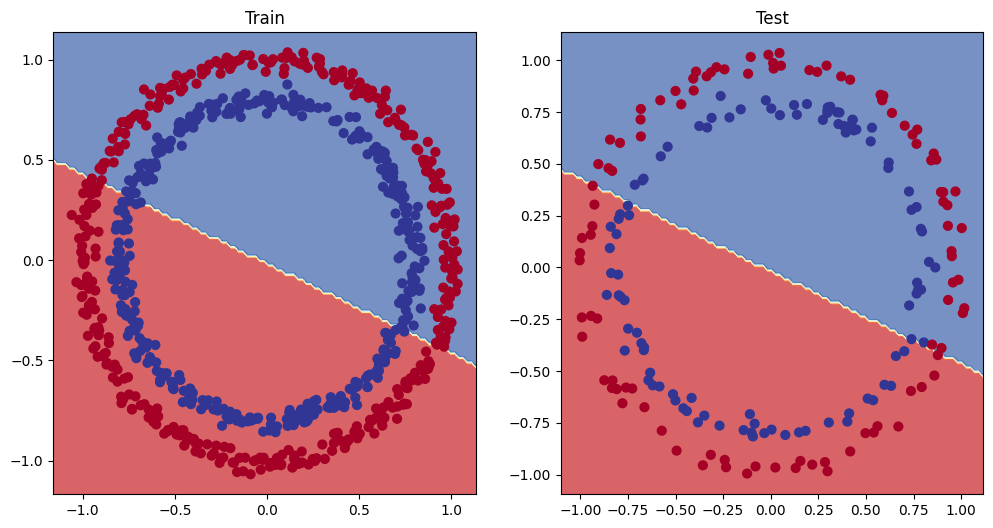

In [33]:
## plot the descision boundary
import numpy as np
##plot descion boundary of the model

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.title('Train')
plot_decision_boundary(model_1,X_train,y_train)

plt.subplot(1,2,2)
plt.title('Test')
plot_decision_boundary(model_1,X_test,y_test)

## preparing the data to see if model can fit a straight line

one way to troubleshoot to a larger problem is to test out a smaller problem

In [34]:
## create some data

weight = 0.7
bias=0.3
start=0
end=1
step=0.01

# create data

X_regression = torch.arange(start,end,step).unsqueeze(dim=1)
y_regression=weight*X_regression +bias #linear regression formula (without epsilon)

##check ot data
print(len(X_regression))

X_regression[:5], y_regression[:5]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [35]:
## create train and test splits
train_split=int(0.8*len(X_regression))
X_train_regression, y_train_regression =X_regression[:train_split],y_regression[:train_split]
X_test_regression, y_test_regression = X_regression[train_split:], y_regression[train_split:]

#check lengths of each

len(X_train_regression),len(y_train_regression),len(X_test_regression), len(y_test_regression)

(80, 80, 20, 20)

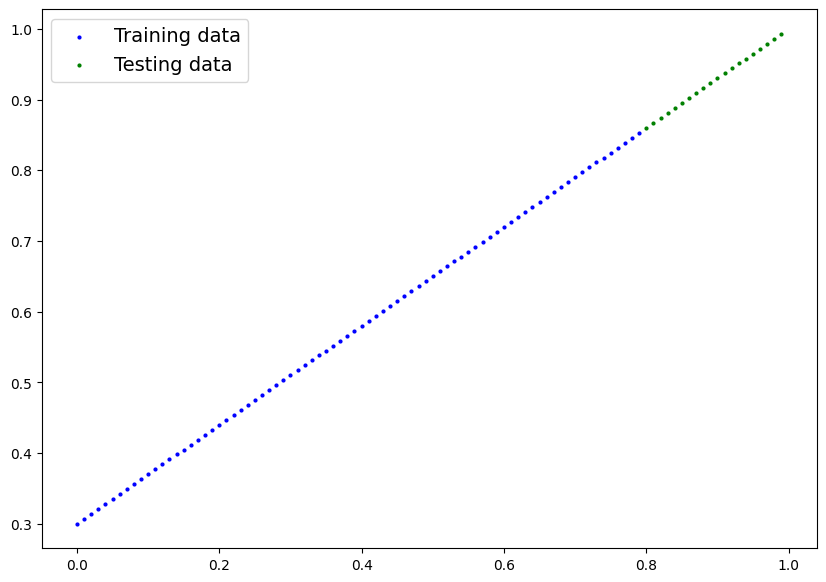

In [36]:
plot_predictions(train_data=X_train_regression,
                 train_labels = y_train_regression,
                 test_data = X_test_regression,
                 test_labels = y_test_regression);

## Adjust model_1 to fit a straight line

In [37]:
###same architecture ass model_1 using nn.Sequential()44

model_2=nn.Sequential(
nn.Linear(in_features =1, out_features =10),
nn.Linear(in_features =10, out_features =10),
nn.Linear(in_features =10, out_features =1)
).to(device)

model_2



Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [38]:
## Loos and optimizer

loss_fn=nn.L1Loss()

optimizer = torch.optim.SGD(params=model_2.parameters(),
                           lr=0.01)

In [39]:
##train the model

torch.manual_seed(42)

##set the number of epochs
epochs =1000

##put thee data in device

X_train_regression, y_train_regression = X_train_regression.to(device), y_train_regression.to(device)

X_test_regression, y_test_regression = X_test_regression.to(device), y_test_regression.to(device)


##Training

for epoch in range(epochs):
    y_pred = model_2(X_train_regression)
    loss = loss_fn(y_pred, y_train_regression)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    #testing
    
    model_2.eval()
    with torch.inference_mode():
        test_pred=model_2(X_test_regression)
        test_loss =loss_fn(test_pred,y_test_regression)
    ##printout whta is happening
    
    if epoch %100 ==0:
        if epoch % 100 ==0:
            print(f'Eoch:{epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test loss: {test_loss:.5f}, Test accuracy : {test_acc:.2f}%')
    

Eoch:0 | Loss: 0.75986, Acc: 51.00% | Test loss: 0.91103, Test accuracy : 46.00%
Eoch:100 | Loss: 0.02858, Acc: 51.00% | Test loss: 0.00081, Test accuracy : 46.00%
Eoch:200 | Loss: 0.02533, Acc: 51.00% | Test loss: 0.00209, Test accuracy : 46.00%
Eoch:300 | Loss: 0.02137, Acc: 51.00% | Test loss: 0.00305, Test accuracy : 46.00%
Eoch:400 | Loss: 0.01964, Acc: 51.00% | Test loss: 0.00341, Test accuracy : 46.00%
Eoch:500 | Loss: 0.01940, Acc: 51.00% | Test loss: 0.00387, Test accuracy : 46.00%
Eoch:600 | Loss: 0.01903, Acc: 51.00% | Test loss: 0.00379, Test accuracy : 46.00%
Eoch:700 | Loss: 0.01878, Acc: 51.00% | Test loss: 0.00381, Test accuracy : 46.00%
Eoch:800 | Loss: 0.01840, Acc: 51.00% | Test loss: 0.00329, Test accuracy : 46.00%
Eoch:900 | Loss: 0.01798, Acc: 51.00% | Test loss: 0.00360, Test accuracy : 46.00%


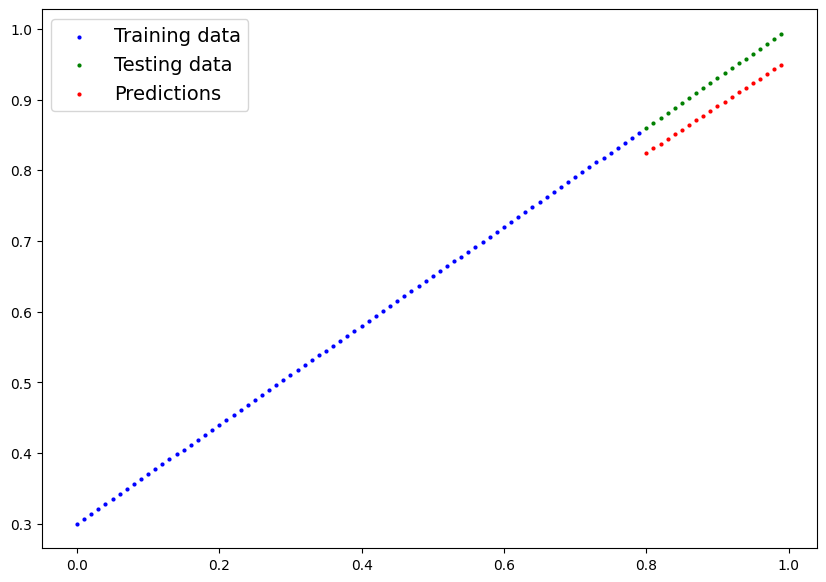

In [40]:
# Turn on evaluation mode

model_2.eval()

#make predictions (inference)

with torch.inference_mode():
    y_preds = model_2(X_test_regression)
    
## plot data and preictions
plot_predictions(train_data=X_train_regression,
                 train_labels=y_train_regression,
                 test_data=X_test_regression,
                 test_labels=y_test_regression,
                 predictions = y_preds);

### The missing piece: non-linearity

"What patterns could you draw if you were given an infinite amounnt of straight and non straight line?"

or in machine learning terms, an infinite(but really it is finite) of linear and non linear functions?

## Recreeating non linear data (red and blue circles)

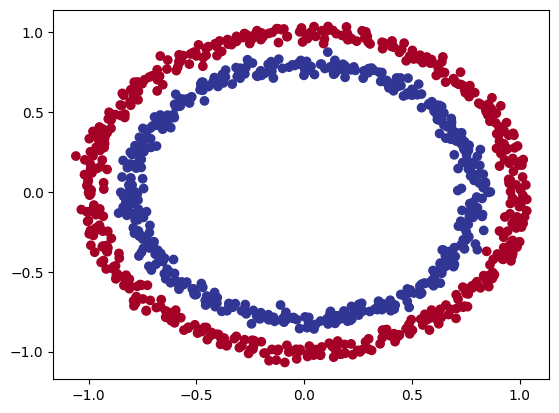

In [41]:
#make plot data
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000

X,y = make_circles(n_samples,
                   noise = 0.03,
                   random_state=42)

plt.scatter(X[:,0],X[:,1], c=y, cmap=plt.cm.RdYlBu);

In [42]:
import torch
from torch import nn

device= 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [43]:
from sklearn.model_selection import train_test_split

# Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print shapes to verify
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

torch.Size([800, 2]) torch.Size([800])
torch.Size([200, 2]) torch.Size([200])


## Building a model with non-linearity

* Linear = straight linear
* Non-linear = non-straight lines

Artificial neural networks are large combination of linear(straight) and non-straight(non-linear) functions which are potnetially able to find

In [44]:
## build a model with non linear activation function

from torch import nn

class circlemodelv2(nn.Module):
    def __init__(self):
        super(). __init__()
        self.layer_1=nn.Linear(in_features=2, out_features=10)
        self.layer_2=nn.Linear(in_features=10, out_features=10)
        self.layer_3=nn.Linear(in_features=10, out_features=1)
        self.relu=nn.ReLU() ## relu is a non-linear activation function
        
    def forward(self, x):
        x = self.relu(self.layer_1(x))
        x = self.relu(self.layer_2(x))
        x = self.layer_3(x)
        return x
    
model_3=circlemodelv2()#.to(device)
model_3


circlemodelv2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [45]:
#setup loss and optimizer

loss_fn=nn.BCEWithLogitsLoss()
optimizer=torch.optim.SGD(model_3.parameters(), lr=0.1 )



In [46]:
#calculate accuracy-out of 100 example , what percentage does our model get right?

def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc=(correct/len(y_pred))*100
    return acc


In [47]:
##Random seeds

torch.manual_seed(42)

epochs=10000

##put all data on target device

X_train,y_train =X_train,y_train
X_test,y_test = X_test, y_test

# loop through the data

for epoch in range(epochs):
    ##Training
    model_3.train()
    
    ##forward pass
    
    y_logits=model_3(X_train).squeeze()
    y_pred =torch.round(torch.sigmoid(y_logits)) ##logits -> prediction probabilities -> prediction labels
    
    ##calculate the loss
    
    loss=loss_fn(y_logits,y_train) ## BCEWithLogitsLoss (takes in logits as first input)
    acc=accuracy_fn(y_true=y_train,
                   y_pred=y_pred)
    
    ##optimizer zero grad
    optimizer.zero_grad()
    
    #Loss backward
    loss.backward()
    
    # step the optimizer
    optimizer.step()
    
    ##Testing
    
    model_3.eval()

    with torch.inference_mode():
        #forward pass
        test_logits = model_3(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        
        ##calculate test loss/acc
       
        test_loss = loss_fn(test_logits,
                               y_test)
        test_acc = accuracy_fn(y_true = y_test,
                            y_pred =test_pred)
        
        ## Print out whats happening
        if epoch % 1000 ==0:
            print(f'Epoch:{epoch} | Loss : {loss:.5f}) | Acc: {acc: .2f}% | Test Loss: {test_loss: .5f}| test acc: {test_acc: .2f}%')
                                                                      

Epoch:0 | Loss : 0.69295) | Acc:  50.00% | Test Loss:  0.69319| test acc:  50.00%
Epoch:1000 | Loss : 0.56818) | Acc:  87.75% | Test Loss:  0.57378| test acc:  86.50%
Epoch:2000 | Loss : 0.04176) | Acc:  99.88% | Test Loss:  0.06583| test acc:  100.00%
Epoch:3000 | Loss : 0.01672) | Acc:  99.88% | Test Loss:  0.03363| test acc:  100.00%
Epoch:4000 | Loss : 0.01048) | Acc:  100.00% | Test Loss:  0.02451| test acc:  99.50%
Epoch:5000 | Loss : 0.00765) | Acc:  100.00% | Test Loss:  0.01993| test acc:  99.50%
Epoch:6000 | Loss : 0.00603) | Acc:  100.00% | Test Loss:  0.01726| test acc:  99.50%
Epoch:7000 | Loss : 0.00499) | Acc:  100.00% | Test Loss:  0.01557| test acc:  99.50%
Epoch:8000 | Loss : 0.00428) | Acc:  100.00% | Test Loss:  0.01451| test acc:  99.50%
Epoch:9000 | Loss : 0.00375) | Acc:  100.00% | Test Loss:  0.01374| test acc:  99.50%


In [48]:
model_3.state_dict()
with torch.inference_mode():

    y_preds=torch.round(torch.sigmoid(model_3(X_test))).squeeze()
y_preds[:10], y_test[:10]

(tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

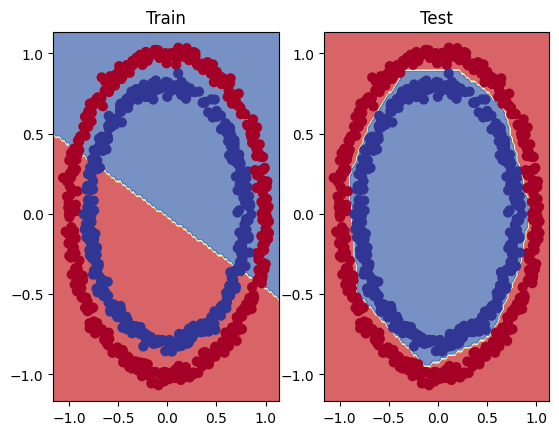

In [50]:
#plot descision boundary

plt.Figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Train')
plot_decision_boundary(model_1,X_train, y_train)
plt.subplot(1,2,2)
plt.title('Test')
plot_decision_boundary(model_3,X_train, y_train)
